# Visualiation for the Experiment 1

In [14]:
import pandas as pd
import matplotlib.pylab as plt

In [15]:
from exp.similarity_measures import total_variational_distance, hellinger_distance

In [16]:
from matplotlib import rcParams

fontsize_small = 18
fontsize_large = 24
rcParams['font.size'] = fontsize_small
rcParams['axes.titlesize'] = fontsize_large
rcParams['legend.fontsize'] = fontsize_large
rcParams['xtick.labelsize'] = fontsize_small
rcParams['ytick.labelsize'] = fontsize_small
rcParams['axes.labelsize'] = fontsize_large

## Parameters

In [17]:
file_path = "./data/"
layout_methods = [
    'csplayout',
    'csprbslayout',
    'dense',
    'noise_adaptive',
    'sabre',
    'mcmclayout'
    #'lcslayout'
]

In [18]:
num_shots = 8192
num_samples = 1

## Collect Experiments

In [19]:
df = pd.DataFrame()
for lm in layout_methods:
    filename = file_path + "exp1_"+ str(lm) + ".csv"
    local_df = pd.read_csv(filename, index_col=[0])
    local_df = local_df.assign(method=[lm] * len(local_df))
    df = pd.concat([df, local_df])

In [20]:
method_list = pd.unique(df["method"])
seed_list = pd.unique(df["seed"])
method_df_dict = {method: df.loc[df["method"] == method] for method in method_list}

In [21]:
method_df_dict["csplayout"]

,seed,state,ideal_count,noise_count,ideal_time,noise_time,ideal_swaps_needed,noise_swaps_needed,method
0,0,10010,126,124,0.002522,0.002409,0,0,csplayout
1,0,10001,146,117,0.002522,0.002409,0,0,csplayout
2,0,100000,143,147,0.002522,0.002409,0,0,csplayout
3,0,111100,139,115,0.002522,0.002409,0,0,csplayout
4,0,10,128,129,0.002522,0.002409,0,0,csplayout
...,...,...,...,...,...,...,...,...,...
59,99,1101,117,107,0.001261,0.001255,0,0,csplayout
60,99,1001,130,154,0.001261,0.001255,0,0,csplayout
61,99,10100,146,144,0.001261,0.001255,0,0,csplayout
62,99,100010,146,142,0.001261,0.001255,0,0,csplayout


## Quality

In [22]:
boxplot_quality_names = method_list
boxplot_quality_data = [[0] * num_samples] * len(method_list)
for idx, method in enumerate(method_list):
    tvd_list = [None] * len(seed_list)
    method_df = method_df_dict[method]
    for idx2, seed in enumerate(seed_list):
        ideal_counts = method_df.loc[method_df["seed"] == seed]["ideal_count"].to_numpy()
        noise_counts = method_df.loc[method_df["seed"] == seed]["noise_count"].to_numpy()
        tvd_list[idx2] = total_variational_distance(ideal_counts, noise_counts)
    boxplot_quality_data[idx] = tvd_list

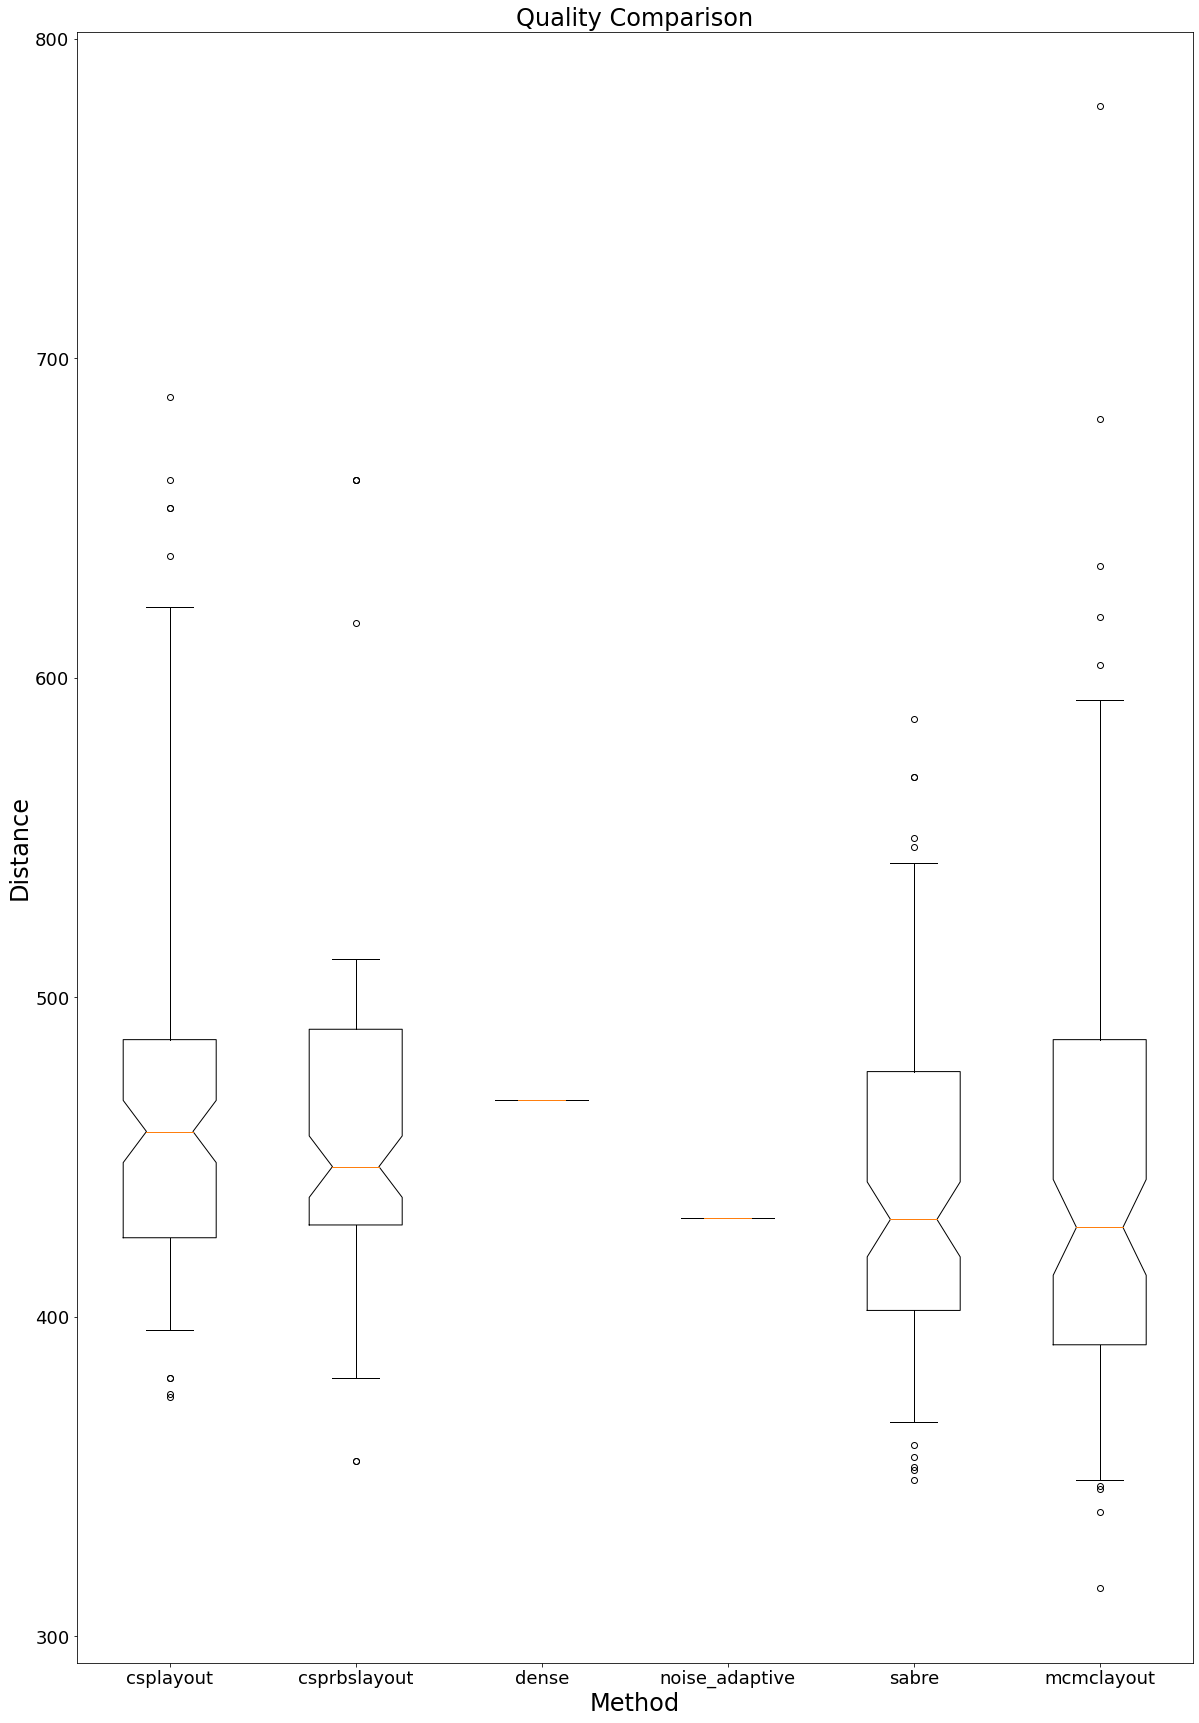

In [23]:
fig, ax = plt.subplots(figsize=(20, 30))
ax.set_title("Quality Comparison")
ax.boxplot(boxplot_quality_data, labels=boxplot_quality_names, notch=True, whis=[5, 95])
ax.set_ylabel("Distance")
ax.set_xlabel("Method")
plt.show()

## Runtime

In [24]:
boxplot_runtime_names = [None] * 2 * len(method_list)
boxplot_runtime_names[::2] = [method + "_ideal" for method in method_list]
boxplot_runtime_names[1::2] = [method + "_noise" for method in method_list]
boxplot_runtime_data = [[0] * num_samples] * 2 * len(method_list)
for idx, method in enumerate(method_list):
    df_seed_grp = method_df_dict[method].groupby("seed")
    ideal_times = df_seed_grp["ideal_time"].mean().to_numpy()
    noise_times = df_seed_grp["noise_time"].mean().to_numpy()
    boxplot_runtime_data[2*idx] = ideal_times 
    boxplot_runtime_data[2*idx+1] = noise_times

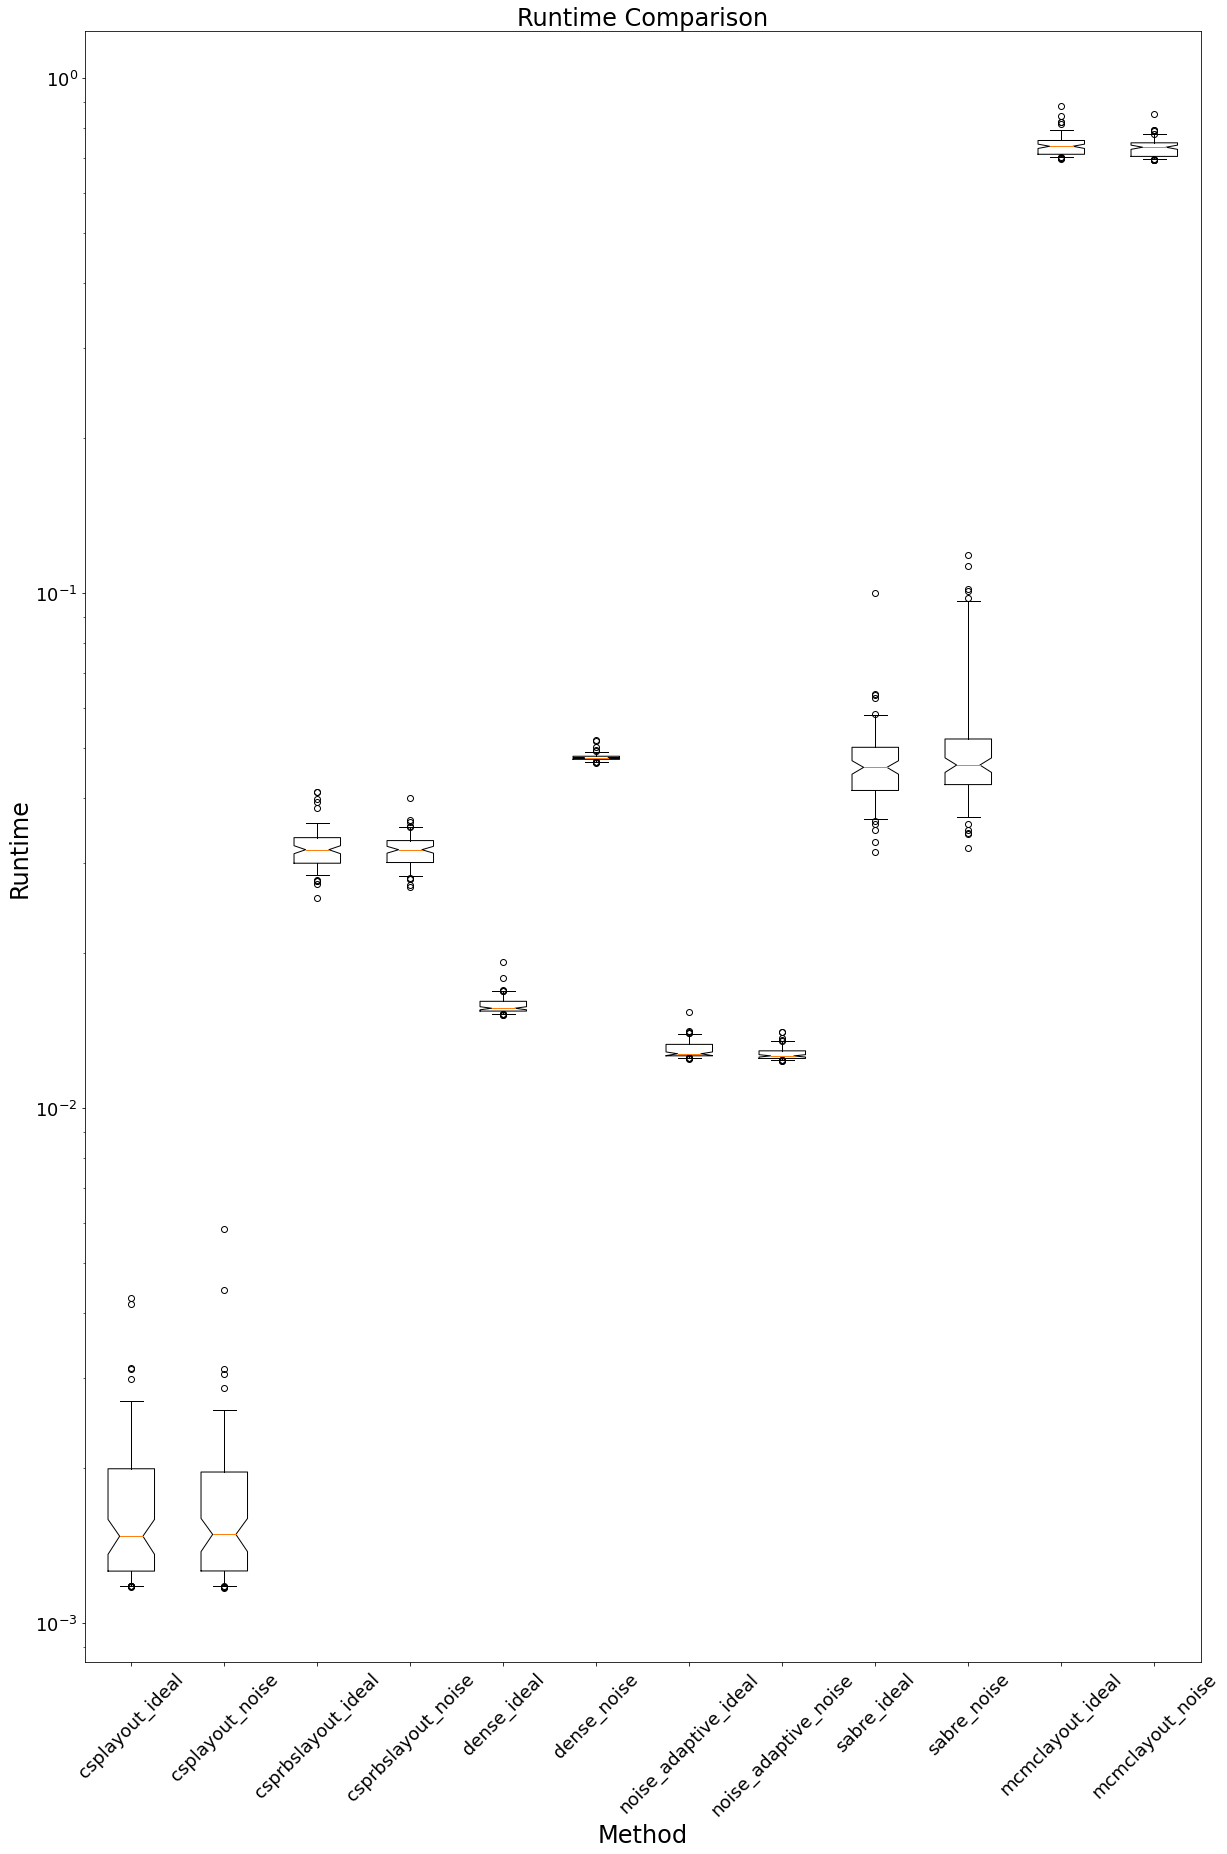

In [25]:
fig, ax = plt.subplots(figsize=(20, 30))
ax.set_title("Runtime Comparison")
ax.boxplot(boxplot_runtime_data, labels=boxplot_runtime_names, notch=True, whis=[5, 95])
ax.set_xticklabels(boxplot_runtime_names, rotation=45)
ax.set_ylabel("Runtime")
ax.set_xlabel("Method")
ax.set_yscale("log")
plt.show()